Mainly following the notebook/kernel https://www.kaggle.com/dgawlik/house-prices-eda

In [24]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

# Download data

In [2]:
ls ../data/

data_description.txt      test.csv                  train.csv.gz
sample_submission.csv     test.csv.gz
sample_submission.csv.gz  train.csv


In [3]:
X_train = pd.read_csv('../data/train.csv')

In [4]:
X_train.shape

(1460, 81)

In [5]:
X_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
X_train = X_train.set_index('Id')

In [7]:
X_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
Id                                    ...                             
1          Lvl    AllPub    Inside    ...            0    NaN   NaN   
2          Lvl    AllPub       FR2    ...            0    NaN   NaN   
3          Lvl    AllPub    Inside    ...            0    NaN   NaN   
4          Lvl    AllPub    Corner    ...            0    NaN   NaN   
5          Lvl    AllPub       FR2    ...            0    NaN   NaN   

   MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                                         
1          NaN       0      2    2008        WD         Normal     208500  
2          NaN       0      5    2007        WD         Normal     181500  
3          NaN       0      9    2008        WD         Normal     223500  
4          NaN       0      2    2006        WD        Abnorml     140000  
5          NaN       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [8]:
X_train.isnull().mean().head()

MSSubClass     0.000000
MSZoning       0.000000
LotFrontage    0.177397
LotArea        0.000000
Street         0.000000
dtype: float64

In [9]:
X_train.shape

(1460, 80)

In [10]:
X_train, y_train = X_train.iloc[:,:-1], X_train.SalePrice

In [11]:
X_train.shape

(1460, 79)

In [12]:
X_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig      ...       ScreenPorch PoolArea PoolQC  \
Id                                      ...                                     
1          Lvl    AllPub    Inside      ...                 0        0    NaN   
2          Lvl    AllPub       FR2      ...                 0        0    NaN   
3          Lvl    AllPub    Inside      ...                 0        0    NaN   
4          Lvl    AllPub    Corner      ...                 0        0    NaN   
5          Lvl    AllPub       FR2      ...                 0        0    NaN   

   Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                                     
1    NaN         NaN       0       2    2008        WD         Normal  
2    NaN         NaN       0       5    2007        WD         Normal  
3    NaN         NaN       0       9    2008        WD         Normal  
4    NaN         NaN       0       2    2006        WD        Abnorml  
5    NaN         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [13]:
X_train.dtypes.head()

MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
dtype: object

In [14]:
a = X_train.dtypes[0]
a
a=='int64'

True

In [15]:
b = X_train.dtypes[1]
b
b=='object'

True

In [16]:
quantitative = [f for f in X_train.columns if X_train.dtypes[f]!='object']

In [17]:
qualitative = [f for f in X_train.columns if X_train.dtypes[f] == 'object']

# EDA

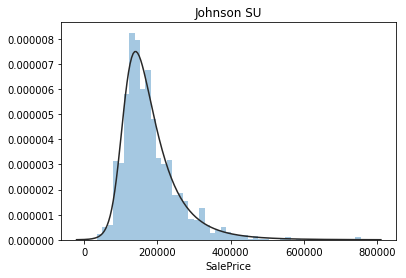

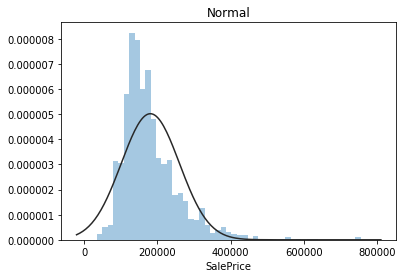

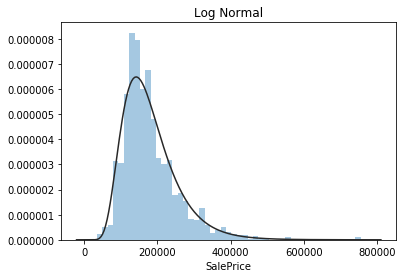

In [18]:
import scipy.stats as st
y = y_train
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
# plt.figure(2)
# sns.distplot(y, kde=True)
plt.figure(3); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(4); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

# Test normality

In [38]:
X_quantitative = X_train.loc[:, quantitative]

In [39]:
X_quantitative = X_quantitative.fillna(X_quantitative.mean())

In [40]:
X_quantitative = X_quantitative.apply(lambda s: pd.Series(stats.shapiro(s)[:2], index=['W: test statistic', 'p-value']), axis=0)

In [41]:
X_quantitative

MSSubClass   LotFrontage   LotArea   OverallQual  \
W: test statistic  8.045680e-01  8.505753e-01  0.351059  9.480106e-01   
p-value            9.105929e-39  4.831785e-35  0.000000  2.689927e-22   

                    OverallCond     YearBuilt  YearRemodAdd  MasVnrArea  \
W: test statistic  8.289263e-01  9.255973e-01  8.628040e-01    0.640318   
p-value            6.778476e-37  2.770050e-26  6.725454e-34    0.000000   

                     BsmtFinSF1  BsmtFinSF2      ...         GarageArea  \
W: test statistic  8.479606e-01    0.327283      ...       9.753278e-01   
p-value            2.814012e-35    0.000000      ...       4.018699e-15   

                     WoodDeckSF   OpenPorchSF  EnclosedPorch  3SsnPorch  \
W: test statistic  7.685168e-01  7.271675e-01       0.414439   0.094934   
p-value            3.228311e-41  1.135052e-43       0.000000   0.000000   

                   ScreenPorch  PoolArea   MiscVal        MoSold        YrSold  
W: test statistic     0.298208  0.041202  0.058233  9.687895e-01  8.970963e-01  
p-value               0.000000  0.000000  0.000000  3.190920e-17  3.419013e-30  

[2 rows x 36 columns]

In [42]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(X_train[quantitative])
normal = normal.apply(test_normality)

In [43]:
normal

MSSubClass       True
LotFrontage      True
LotArea          True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
MasVnrArea       True
BsmtFinSF1       True
BsmtFinSF2       True
BsmtUnfSF        True
TotalBsmtSF      True
1stFlrSF         True
2ndFlrSF         True
LowQualFinSF     True
GrLivArea        True
BsmtFullBath     True
BsmtHalfBath     True
FullBath         True
HalfBath         True
BedroomAbvGr     True
KitchenAbvGr     True
TotRmsAbvGrd     True
Fireplaces       True
GarageYrBlt      True
GarageCars       True
GarageArea       True
WoodDeckSF       True
OpenPorchSF      True
EnclosedPorch    True
3SsnPorch        True
ScreenPorch      True
PoolArea         True
MiscVal          True
MoSold           True
YrSold           True
dtype: bool

In [ ]:
print(not normal.any())

# Plot many variables

In [70]:
X_train['y'] = y_train

In [71]:
f = pd.melt(X_train, value_vars=quantitative)

In [72]:
f.head()

variable  value
0  MSSubClass   60.0
1  MSSubClass   20.0
2  MSSubClass   60.0
3  MSSubClass   70.0
4  MSSubClass   60.0

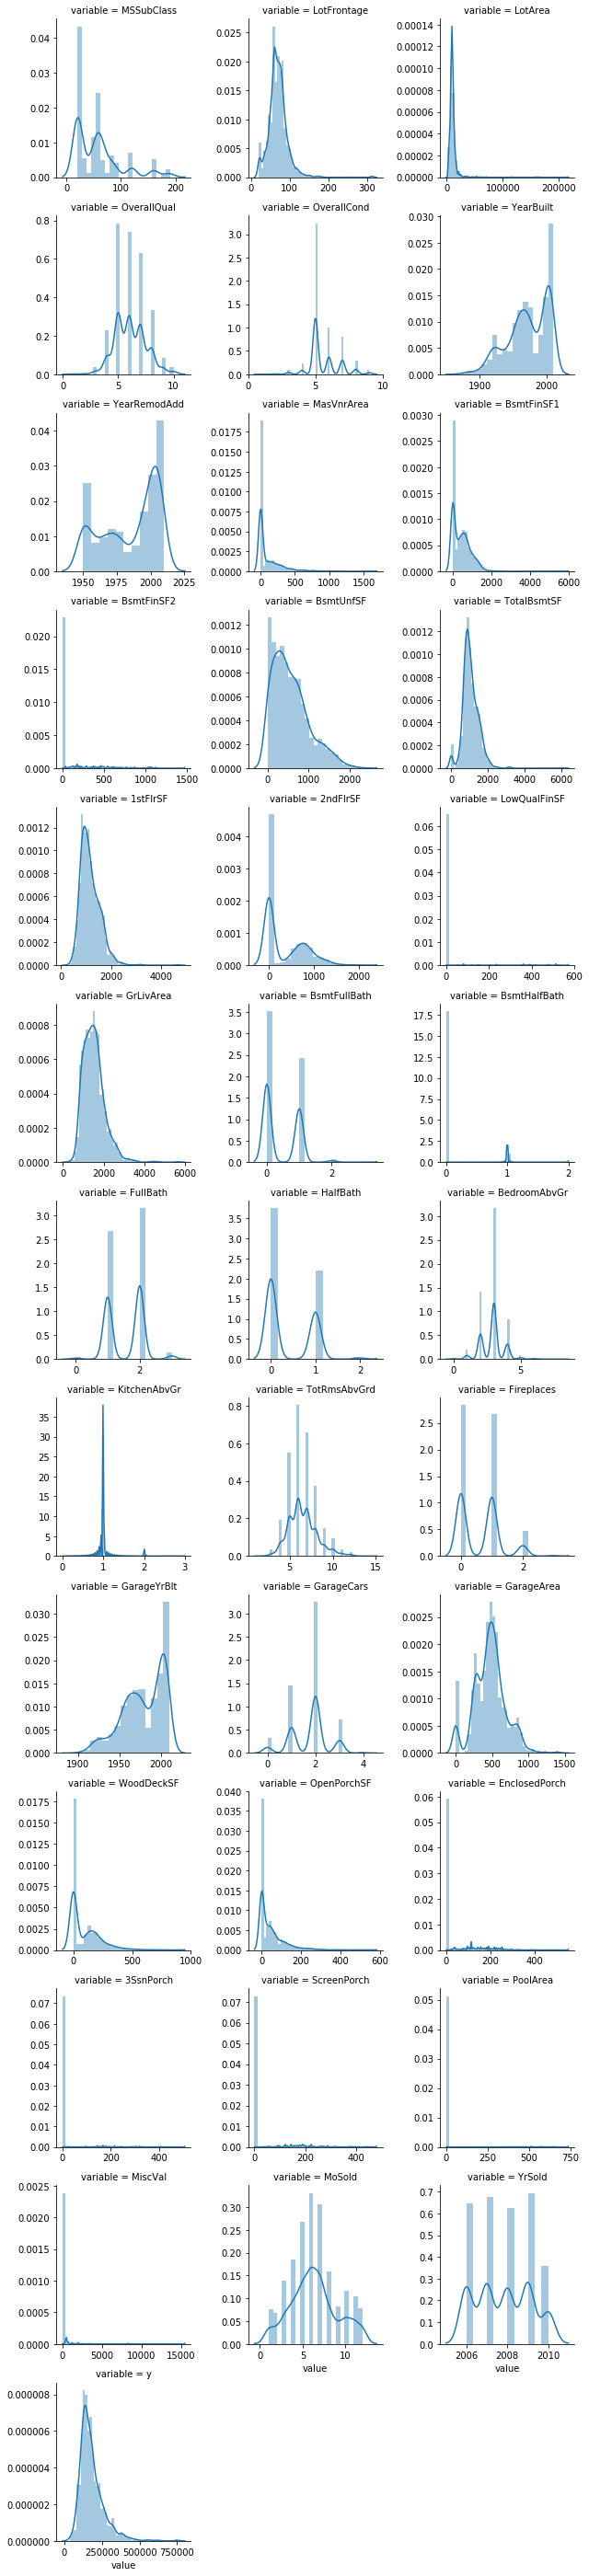

In [73]:
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.distplot, "value")

In [80]:
X_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig   ...   PoolArea PoolQC Fence MiscFeature  \
Id                                   ...                                       
1          Lvl    AllPub    Inside   ...          0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2   ...          0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside   ...          0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner   ...          0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2   ...          0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition       y  
Id                                                          
1        0      2    2008        WD         Normal  208500  
2        0      5    2007        WD         Normal  181500  
3        0      9    2008        WD         Normal  223500  
4        0      2    2006        WD        Abnorml  140000  
5        0     12    2008        WD         Normal  250000  

[5 rows x 80 columns]

In [82]:
for c in qualitative:
    X_train[c] = X_train[c].astype('category')
    if X_train[c].isnull().any():
        X_train[c] = X_train[c].cat.add_categories(['MISSING'])
        X_train[c] = X_train[c].fillna('MISSING')

In [84]:
X_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
Id                                                                       
1           60       RL         65.0     8450   Pave  MISSING      Reg   
2           20       RL         80.0     9600   Pave  MISSING      Reg   
3           60       RL         68.0    11250   Pave  MISSING      IR1   
4           70       RL         60.0     9550   Pave  MISSING      IR1   
5           60       RL         84.0    14260   Pave  MISSING      IR1   

   LandContour Utilities LotConfig   ...   PoolArea   PoolQC    Fence  \
Id                                   ...                                
1          Lvl    AllPub    Inside   ...          0  MISSING  MISSING   
2          Lvl    AllPub       FR2   ...          0  MISSING  MISSING   
3          Lvl    AllPub    Inside   ...          0  MISSING  MISSING   
4          Lvl    AllPub    Corner   ...          0  MISSING  MISSING   
5          Lvl    AllPub       FR2   ...          0  MISSING  MISSING   

   MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition       y  
Id                                                                      
1      MISSING       0      2    2008        WD         Normal  208500  
2      MISSING       0      5    2007        WD         Normal  181500  
3      MISSING       0      9    2008        WD         Normal  223500  
4      MISSING       0      2    2006        WD        Abnorml  140000  
5      MISSING       0     12    2008        WD         Normal  250000  

[5 rows x 80 columns]

In [89]:
f = pd.melt(X_train, id_vars=['y'], value_vars=qualitative)

In [90]:
f.head()

y  variable value
0  208500  MSZoning    RL
1  181500  MSZoning    RL
2  223500  MSZoning    RL
3  140000  MSZoning    RL
4  250000  MSZoning    RL

In [92]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

/Users/florentmartin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


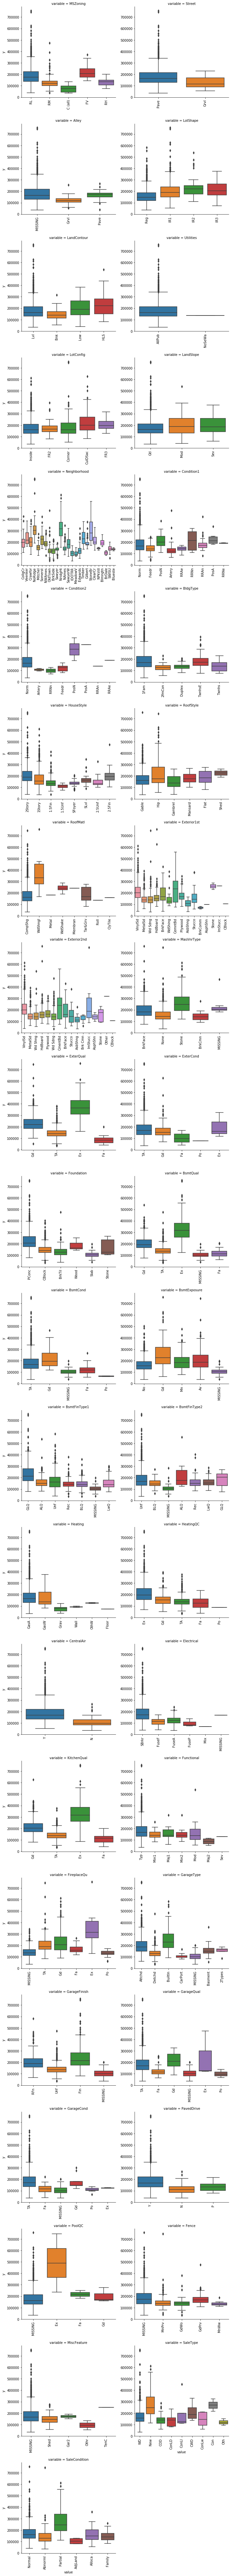

In [94]:
f = pd.melt(X_train, id_vars=['y'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "y")